OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):
3.1.0


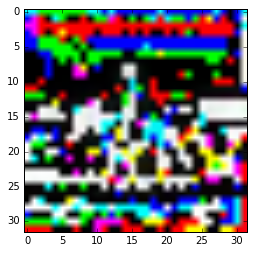

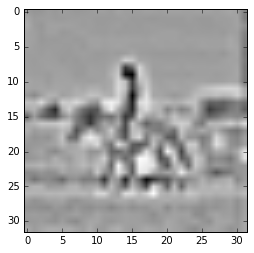

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print 'OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):'
print cv2.__version__

IMAGE_SIZE = 32
CHANEL_SIZE = IMAGE_SIZE * IMAGE_SIZE

X = pd.read_csv('../data/Xtr.csv', header=None)
X = X.as_matrix()
X = X[:, 0:-1]

Y = pd.read_csv('../data/Ytr.csv')

#%% 
index = 100
image1 = X[index,:]
image1 = image1.reshape((3, CHANEL_SIZE))
image1 = image1.reshape((3, IMAGE_SIZE, IMAGE_SIZE))
image1 = image1.swapaxes(0,1)
image1 = image1.swapaxes(1,2)
im_gray = np.dot(image1[:,:,:3],[0.299, 0.587, 0.114])

plt.figure()
plt.imshow(image1)
plt.figure()
plt.imshow(im_gray, cmap='gray')

In [2]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

im_kp, im_desc = gen_sift_features(im_gray)

print('Here are what our SIFT features look like for the image {} in train dataset'.format(index))
show_sift_features(im_gray, image1, im_kp);



AttributeError: 'module' object has no attribute 'xfeatures2d'

In [5]:
cv2.features2d

AttributeError: 'module' object has no attribute 'features2d'